### Deliverable 1: Preprocessing the Data for a Neural Network

In [20]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
airfields_df = pd.read_csv("Resources/airfield_list.csv")
airfields_df.head()

,Name,Country,Archipelago,Latitude,Longitude,Type,Runway_1,Runway_2,Surface,Size
0,Kadena Air Base,U.S.,Ryukyu Islands,26.355690,127.767875,Military,"12,100","12,100",Asphalt/Concrete,3
1,Guam Intl Airport,U.S.,Mariana Islands,13.485298,144.800812,Commercial,"12,015","10,014",Asphalt/Concrete,3
2,Andersen AFB,U.S.,Mariana Islands,13.588225,144.920208,Military,"10,527","11,200",Asphalt/Concrete,3
3,Naha Airport,Japan,Ryukyu Islands,26.206403,127.646542,Commercial,"9,843","8,858",Asphalt,3
4,Saipan Intl Airport,U.S.,Mariana Islands,15.119743,145.728279,Commercial,"8,700","7,001",Asphalt,3


In [21]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
airfields_df = airfields_df.drop(columns = ["Name","Country","Archipelago","Latitude","Longitude"])
airfields_df.head()

,Type,Runway_1,Runway_2,Surface,Size
0,Military,"12,100","12,100",Asphalt/Concrete,3
1,Commercial,"12,015","10,014",Asphalt/Concrete,3
2,Military,"10,527","11,200",Asphalt/Concrete,3
3,Commercial,"9,843","8,858",Asphalt,3
4,Commercial,"8,700","7,001",Asphalt,3


In [22]:
# Determine the number of unique values in each column.
airfields_df.nunique()

Type          5
Runway_1    100
Runway_2      9
Surface      10
Size          4
dtype: int64

In [23]:
# Look at APPLICATION_TYPE value counts for binning
airfields_type_counts = airfields_df["Surface"].value_counts()
airfields_type_counts

Asphalt             45
Grass               38
Concrete            30
Asphalt/Concrete    23
Coral               18
Gravel               6
Macadam              1
Paved                1
Turf                 1
Turf/gravel          1
Name: Surface, dtype: int64

<AxesSubplot:ylabel='Density'>

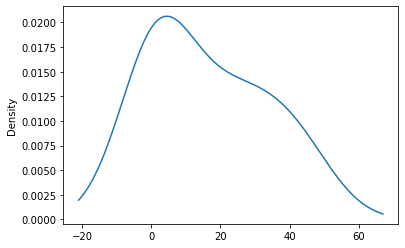

In [24]:
# Visualize the value counts of APPLICATION_TYPE
airfields_type_counts.plot.density()

In [25]:
# Bin runway surface values with Replace function 

airfields_df = airfields_df.replace(['Asphalt','Concrete','Asphalt/Concrete'],'Paved')
airfields_df = airfields_df.replace(['Coral','Macadam'],'Hard')
airfields_df = airfields_df.replace(['Turf/gravel'],'Gravel')
airfields_df = airfields_df.replace(['Turf'],'Grass')
airfields_df.head()

,Type,Runway_1,Runway_2,Surface,Size
0,Military,"12,100","12,100",Paved,3
1,Commercial,"12,015","10,014",Paved,3
2,Military,"10,527","11,200",Paved,3
3,Commercial,"9,843","8,858",Paved,3
4,Commercial,"8,700","7,001",Paved,3


In [26]:
# Look at airfields "Surface" value counts for binning
airfields_type_counts = airfields_df["Surface"].value_counts()
airfields_type_counts

Paved     99
Grass     39
Hard      19
Gravel     7
Name: Surface, dtype: int64

In [27]:
# Determine which values to replace if counts are less than ..?
replace_class = list(classification_counts[classification_counts < 1500].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [18]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['Type', 'Runway_1', 'Runway_2', 'Surface']

In [19]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names_out(application_cat)
encode_df.head()

,Type_Air taxi,Type_Commercial,Type_General,Type_Military,Type_Unimproved,"Runway_1_1,100","Runway_1_1,200","Runway_1_1,350","Runway_1_1,500","Runway_1_1,800",...,"Runway_2_12,100","Runway_2_5,000","Runway_2_7,001","Runway_2_8,858",Runway_2_8000,Runway_2_8500,Surface_Grass,Surface_Gravel,Surface_Hard,Surface_Paved
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [12]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

C:\Users\drchr\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

C:\Users\drchr\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [15]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                3520      
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"
batch_size = 500

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(filepath=checkpoint_path,verbose=1,save_weights_only=True,save_freq= 5 * batch_size)# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [17]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 1s 989us/step - loss: 0.5690 - accuracy: 0.7224
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5556 - accuracy: 0.7304
Epoch 3/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5523 - accuracy: 0.7319
Epoch 4/100
 76/804 [=>............................] - ETA: 0s - loss: 0.5456 - accuracy: 0.7410
Epoch 4: saving model to checkpoints\weights.04.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5505 - accuracy: 0.7322
Epoch 5/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5499 - accuracy: 0.7312
Epoch 6/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5481 - accuracy: 0.7341
Epoch 7/100
132/804 [===>..........................] - ETA: 0s - loss: 0.5649 - accuracy: 0.7232
Epoch 7: saving model to checkpoints\weights.07.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5484 - accuracy: 0.7338
Epoch 8/100
804

In [18]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5554 - accuracy: 0.7265 - 564ms/epoch - 2ms/step
Loss: 0.5554324388504028, Accuracy: 0.7265306115150452


In [19]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization_2.h5")